# Setup

In [2]:
#Dependencies and Setup
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib notebook
import plotly.graph_objects as go
import seaborn as sns

In [5]:
# File to Load 
file_to_load = "Resources/crime_and_incarceration_by_state.csv"

# Read crime data File and store into Pandas data frame
crime_data = pd.read_csv(file_to_load)
crime_data.head(51)

jurisdiction  includes_jails  year  prisoner_count  \
0          FEDERAL           False  2001          149852   
1          ALABAMA           False  2001           24741   
2           ALASKA            True  2001            4570   
3          ARIZONA           False  2001           27710   
4         ARKANSAS           False  2001           11489   
5       CALIFORNIA           False  2001          157142   
6         COLORADO           False  2001           17278   
7      CONNECTICUT            True  2001           17507   
8         DELAWARE            True  2001            6841   
9          FLORIDA           False  2001           72404   
10         GEORGIA           False  2001           45937   
11          HAWAII            True  2001            5116   
12           IDAHO           False  2001            5270   
13        ILLINOIS           False  2001           44348   
14         INDIANA           False  2001           19646   
15            IOWA           False  2001            7962   
16          KANSAS           False  2001            8574   
17        KENTUCKY           False  2001           10720   
18       LOUISIANA           False  2001           19660   
19           MAINE           False  2001            1675   
20        MARYLAND           False  2001           23739   
21   MASSACHUSETTS           False  2001           10203   
22        MICHIGAN           False  2001           48849   
23       MINNESOTA           False  2001            6406   
24     MISSISSIPPI           False  2001           15131   
25        MISSOURI           False  2001           28575   
26         MONTANA           False  2001            2795   
27        NEBRASKA           False  2001            3915   
28          NEVADA           False  2001            9862   
29   NEW HAMPSHIRE           False  2001            2419   
30      NEW JERSEY           False  2001           26052   
31      NEW MEXICO           False  2001            5668   
32        NEW YORK           False  2001           67554   
33  NORTH CAROLINA           False  2001           32203   
34    NORTH DAKOTA           False  2001            1088   
35            OHIO           False  2001           44868   
36        OKLAHOMA           False  2001           21719   
37          OREGON           False  2001           10950   
38    PENNSYLVANIA           False  2001           37641   
39    RHODE ISLAND            True  2001            3364   
40  SOUTH CAROLINA           False  2001           21719   
41    SOUTH DAKOTA           False  2001            2799   
42       TENNESSEE           False  2001           17466   
43           TEXAS           False  2001          148480   
44            UTAH           False  2001            4145   
45         VERMONT            True  2001            1400   
46        VIRGINIA           False  2001           31472   
47      WASHINGTON           False  2001           15226   
48   WEST VIRGINIA           False  2001            3403   
49       WISCONSIN           False  2001           20766   
50         WYOMING           False  2001            1487   

   crime_reporting_change crimes_estimated  state_population  \
0                     NaN              NaN               NaN   
1                   False            False         4468912.0   
2                   False            False          633630.0   
3                   False            False         5306966.0   
4                   False            False         2694698.0   
5                   False            False        34600463.0   
6                   False            False         4430989.0   
7                   False            False         3434602.0   
8                   False            False          796599.0   
9                   False            False        16373330.0   
10                  False            False         8405677.0   
11                  False            False         1227024.0   
12                  False            False         13

In [8]:
#drop the rows with n/a (dropping federal rows)
crime_data =crime_data.dropna(subset=['state_population'])
crime_data

jurisdiction  includes_jails  year  prisoner_count  \
1          ALABAMA           False  2001           24741   
2           ALASKA            True  2001            4570   
3          ARIZONA           False  2001           27710   
4         ARKANSAS           False  2001           11489   
5       CALIFORNIA           False  2001          157142   
..             ...             ...   ...             ...   
811       VIRGINIA           False  2016           29882   
812     WASHINGTON           False  2016           17228   
813  WEST VIRGINIA           False  2016            5899   
814      WISCONSIN           False  2016           23163   
815        WYOMING           False  2016            2352   

    crime_reporting_change crimes_estimated  state_population  \
1                    False            False         4468912.0   
2                    False            False          633630.0   
3                    False            False         5306966.0   
4                    False            False         2694698.0   
5                    False            False        34600463.0   
..                     ...              ...               ...   
811                  False            False         8414380.0   
812                  False            False         7280934.0   
813                  False            False         1828637.0   
814                  False            False         5772917.0   
815                  False            False          584910.0   

     violent_crime_total  murder_manslaughter  rape_legacy  rape_revised  \
1                19582.0                379.0       1369.0           NaN   
2                 3735.0                 39.0        501.0           NaN   
3                28675.0                400.0       1518.0           NaN   
4                12190.0                148.0        892.0           NaN   
5               212867.0               2206.0       9960.0           NaN   
..                   ...                  ...          ...           ...   
811              18495.0                482.0          NaN        2830.0   
812              22101.0                195.0          NaN        3133.0   
813               6633.0                 85.0          NaN         684.0   
814              17716.0                232.0          NaN        2005.0   
815               1431.0                 20.0          NaN         206.0   

     robbery  agg_assault  property_crime_total  burglary   larceny  \
1     5584.0      12250.0              173253.0   40642.0  119992.0   
2      514.0       2681.0               23160.0    3847.0   16695.0   
3     8868.0      17889.0              293874.0   54821.0  186850.0   
4     2181.0       8969.0               99106.0   22196.0   69590.0   
5    64614.0     136087.0             1134189.0  232273.0  697739.0   
..       ...          ...                   ...       ...       ...   
811   4826.0      10357.0              157292.0   20159.0  127285.0   
812   5649.0      13124.0              254994.0   49249.0  173423.0   
813    720.0       5144.0               37282.0    9127.0   25657.0   
814   4707.0      10772.0              111911.0   19498.0   82455.0   
815     59.0       1146.0               11460.0    1771.0    8889.0   

     vehicle_theft  
1          12619.0  
2           2618.0  
3          52203.0  
4           7320.0  
5         204177.0  
..             ...  
811         9848.0  
812        32322.0  
813         2498.0  
814         9958.0  
815          800.0  

[799 rows x 17 columns]

In [9]:
#check data information
crime_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 799 entries, 1 to 815
Data columns (total 17 columns):
jurisdiction              799 non-null object
includes_jails            799 non-null bool
year                      799 non-null int64
prisoner_count            799 non-null int64
crime_reporting_change    799 non-null object
crimes_estimated          799 non-null object
state_population          799 non-null float64
violent_crime_total       799 non-null float64
murder_manslaughter       799 non-null float64
rape_legacy               749 non-null float64
rape_revised              199 non-null float64
robbery                   799 non-null float64
agg_assault               799 non-null float64
property_crime_total      799 non-null float64
burglary                  799 non-null float64
larceny                   799 non-null float64
vehicle_theft             799 non-null float64
dtypes: bool(1), float64(11), int64(2), object(3)
memory usage: 106.9+ KB


In [14]:
#limit data analysis by taking the ten most populated states
crime_data_top=crime_data.groupby(['jurisdiction']).agg(Population_Total=pd.NamedAgg(column='state_population', aggfunc='sum'))
crime_data_top= crime_data_top.nlargest(6, 'Population_Total')
crime_data_top

Population_Total
jurisdiction                  
CALIFORNIA         592487636.0
TEXAS              392915389.0
FLORIDA            296088366.0
NEW YORK           291414318.0
ILLINOIS           204766471.0
PENNSYLVANIA       201113208.0

# Incarceration Rate

In [15]:
#extracting the prisoner count and total pop for incarceration rate (each state for every year)
incar_rate=crime_data.groupby(['jurisdiction', 'year']).agg(prisoner_count=pd.NamedAgg(column='prisoner_count', aggfunc='sum'),
                                                                   total_pop=pd.NamedAgg(column='state_population', aggfunc='sum'))
incar_rate

prisoner_count  total_pop
jurisdiction year                           
ALABAMA      2001           24741  4468912.0
             2002           25100  4478896.0
             2003           27614  4503726.0
             2004           25635  4525375.0
             2005           24315  4548327.0
...                           ...        ...
WYOMING      2012            2187   576626.0
             2013            2288   583223.0
             2014            2369   584153.0
             2015            2400   586107.0
             2016            2352   584910.0

[799 rows x 2 columns]

In [16]:
#add the incarceration rate column
## NOTE: scale by 100,000 per definition of IR and CR

incar_rate['Incarcenation Rate']=incar_rate['prisoner_count']/incar_rate['total_pop']*100000
incar_rate= incar_rate.reset_index()

In [17]:
#split out by states for incarceration rate (top six most populated states)
CA_IR = incar_rate[incar_rate["jurisdiction"] == 'CALIFORNIA']["Incarcenation Rate"]
TX_IR = incar_rate[incar_rate["jurisdiction"] == 'TEXAS']["Incarcenation Rate"]
FL_IR = incar_rate[incar_rate["jurisdiction"] == 'FLORIDA']["Incarcenation Rate"]
NY_IR= incar_rate[incar_rate["jurisdiction"] == 'NEW YORK']["Incarcenation Rate"]
PA_IR= incar_rate[incar_rate["jurisdiction"] == 'PENNSYLVANIA']["Incarcenation Rate"]
IL_IR= incar_rate[incar_rate["jurisdiction"] == 'ILLINOIS']["Incarcenation Rate"]


In [18]:
## NOTE: Notice that for NY there was an empty row - I copied previous year row to avoid divide by zero
print(NY_IR)

496    353.975902
497    349.764687
498    340.342252
499    332.062168
500    326.324863
501    329.107002
502    325.105612
503    308.861379
504    299.256151
505    290.896627
506    283.032955
507    276.142495
508    270.678646
509    265.174709
510    255.143528
Name: Incarcenation Rate, dtype: float64


# Crime Rate

In [19]:
#extracting the violent crime count and total pop for crime rate (each state for every year)
crime_rate=crime_data.groupby(['jurisdiction', 'year']).agg(violent_crime_total=pd.NamedAgg(column='violent_crime_total', aggfunc='sum'),
                                                                   total_pop=pd.NamedAgg(column='state_population', aggfunc='sum'))
crime_rate


violent_crime_total  total_pop
jurisdiction year                                
ALABAMA      2001              19582.0  4468912.0
             2002              19931.0  4478896.0
             2003              19331.0  4503726.0
             2004              19324.0  4525375.0
             2005              19678.0  4548327.0
...                                ...        ...
WYOMING      2012               1161.0   576626.0
             2013               1212.0   583223.0
             2014               1142.0   584153.0
             2015               1302.0   586107.0
             2016               1431.0   584910.0

[799 rows x 2 columns]

In [20]:
#add the crime rate column
crime_rate['crime rate']= crime_rate['violent_crime_total']/crime_rate['total_pop']*100000
crime_rate= crime_rate.reset_index()
crime_rate

jurisdiction  year  violent_crime_total  total_pop  crime rate
0        ALABAMA  2001              19582.0  4468912.0  438.182717
1        ALABAMA  2002              19931.0  4478896.0  444.998053
2        ALABAMA  2003              19331.0  4503726.0  429.222382
3        ALABAMA  2004              19324.0  4525375.0  427.014336
4        ALABAMA  2005              19678.0  4548327.0  432.642596
..           ...   ...                  ...        ...         ...
794      WYOMING  2012               1161.0   576626.0  201.343679
795      WYOMING  2013               1212.0   583223.0  207.810734
796      WYOMING  2014               1142.0   584153.0  195.496728
797      WYOMING  2015               1302.0   586107.0  222.143738
798      WYOMING  2016               1431.0   584910.0  244.653024

[799 rows x 5 columns]

In [21]:
#split out by states for crime rate (top six most populated states)
CA_CR = crime_rate[crime_rate["jurisdiction"] == 'CALIFORNIA']["crime rate"]
TX_CR = crime_rate[crime_rate["jurisdiction"] == 'TEXAS']["crime rate"]
FL_CR = crime_rate[crime_rate["jurisdiction"] == 'FLORIDA']["crime rate"]
NY_CR = crime_rate[crime_rate["jurisdiction"] == 'NEW YORK']["crime rate"]
PA_CR = crime_rate[crime_rate["jurisdiction"] == 'PENNSYLVANIA']["crime rate"]
IL_CR = crime_rate[crime_rate["jurisdiction"] == 'ILLINOIS']["crime rate"]

In [22]:
#extract years for data set for each state
CA_YR = crime_rate[crime_rate["jurisdiction"] == 'CALIFORNIA']["year"]
TX_YR = crime_rate[crime_rate["jurisdiction"] == 'TEXAS']["year"]
FL_YR = crime_rate[crime_rate["jurisdiction"] == 'FLORIDA']["year"]
NY_YR = crime_rate[crime_rate["jurisdiction"] == 'NEW YORK']["year"]
PA_YR = crime_rate[crime_rate["jurisdiction"] == 'PENNSYLVANIA']["year"]
IL_YR = crime_rate[crime_rate["jurisdiction"] == 'ILLINOIS']["year"]

# IR vs CR Plot

<IPython.core.display.Javascript object>


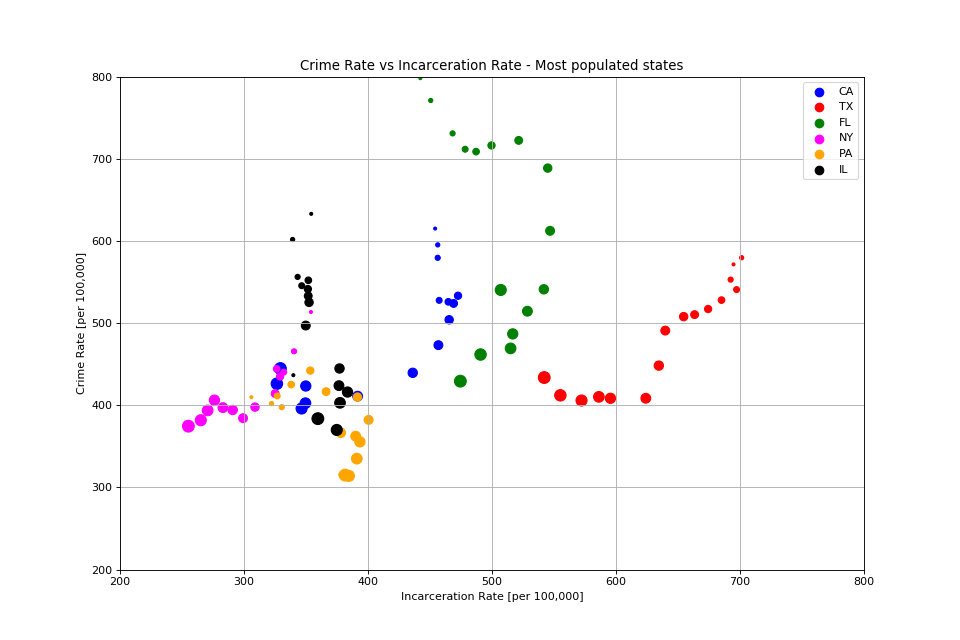

In [23]:
#scatter plot (colors indicate states, size indicates years)
fig, ax= plt.subplots(figsize=[12,8])

ax.scatter(CA_IR, CA_CR, color='blue', s=(CA_YR-2000)*7, label='CA')
ax.scatter(TX_IR, TX_CR, color='red',s=(TX_YR-2000)*7, label='TX')
ax.scatter(FL_IR, FL_CR, color='green',s=(FL_YR-2000)*7, label='FL')
ax.scatter(NY_IR, NY_CR, color='magenta',s=(NY_YR-2000)*7, label='NY')
ax.scatter(PA_IR, PA_CR, color='orange',s=(NY_YR-2000)*7, label='PA')
ax.scatter(IL_IR, IL_CR, color='black',s=(NY_YR-2000)*7, label='IL')

ax.set_xlabel('Incarceration Rate [per 100,000]')
ax.set_ylabel('Crime Rate [per 100,000]')
ax.set_title('Crime Rate vs Incarceration Rate - Most populated states')


plt.xlim(200,800)
plt.ylim(200,800)
plt.grid()
plt.legend()

#save the figure as png
plt.savefig('Crime Rate vs Incarveration Rate- Most Populated States.png')
plt.show()

# IR vs CR by state

<IPython.core.display.Javascript object>


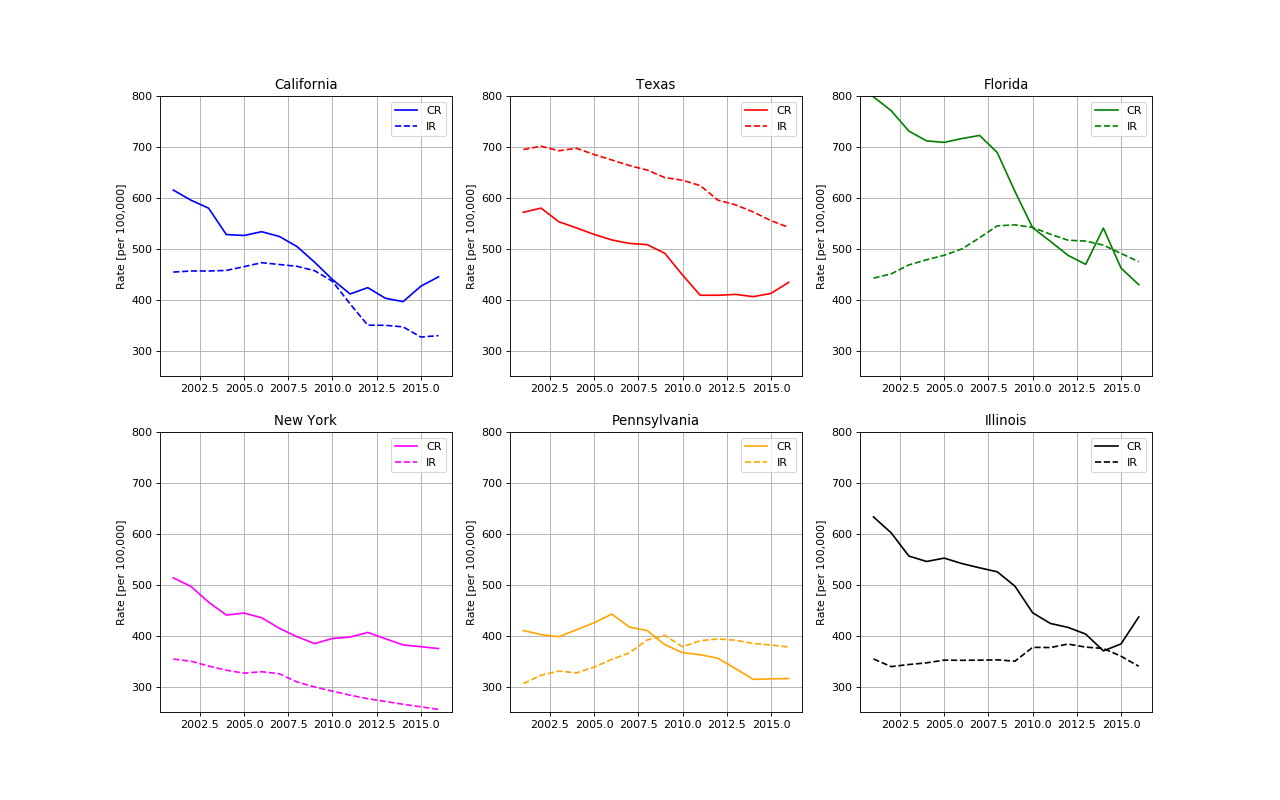

In [24]:
fig, ax= plt.subplots(2,3, figsize=[16,10])

ax[0,0].plot(CA_YR, CA_CR, color='blue', label ='CR')
ax[0,0].plot(CA_YR, CA_IR, color='blue', linestyle='--', label ='IR')
ax[0,0].set_ylabel('Rate [per 100,000]')
ax[0,0].set_title('California')
ax[0,0].set_ylim(250,800)
ax[0,0].grid()
ax[0,0].legend()

ax[0,1].plot(TX_YR, TX_CR, color='red', label ='CR')
ax[0,1].plot(TX_YR, TX_IR, color='red', linestyle='--', label ='IR')
ax[0,1].set_ylabel('Rate [per 100,000]')
ax[0,1].set_title('Texas')
ax[0,1].set_ylim(250,800)
ax[0,1].grid()
ax[0,1].legend()

ax[0,2].plot(FL_YR, FL_CR, color='green', label ='CR')
ax[0,2].plot(FL_YR, FL_IR, color='green', linestyle='--', label ='IR')
ax[0,2].set_ylabel('Rate [per 100,000]')
ax[0,2].set_title('Florida')
ax[0,2].set_ylim(250,800)
ax[0,2].grid()
ax[0,2].legend()

ax[1,0].plot(NY_YR, NY_CR, color='magenta', label ='CR')
ax[1,0].plot(NY_YR, NY_IR, color='magenta', linestyle='--', label ='IR')
ax[1,0].set_ylabel('Rate [per 100,000]')
ax[1,0].set_title('New York')
ax[1,0].set_ylim(250,800)
ax[1,0].grid()
ax[1,0].legend()

ax[1,1].plot(PA_YR, PA_CR, color='orange', label ='CR')
ax[1,1].plot(PA_YR, PA_IR, color='orange', linestyle='--', label ='IR')
ax[1,1].set_ylabel('Rate [per 100,000]')
ax[1,1].set_title('Pennsylvania')
ax[1,1].set_ylim(250,800)
ax[1,1].grid()
ax[1,1].legend()

ax[1,2].plot(IL_YR, IL_CR, color='black', label ='CR')
ax[1,2].plot(IL_YR, IL_IR, color='black', linestyle='--', label ='IR')
ax[1,2].set_ylabel('Rate [per 100,000]')
ax[1,2].set_title('Illinois')
ax[1,2].set_ylim(250,800)
ax[1,2].grid()
ax[1,2].legend()


#save the figure as png
plt.savefig('States CR vs IR for Violent Crime Rate.png')
plt.show()

# Coefficient Analysis

In [25]:
## NOTE: computing correlation coeffs CR vs IR

CA_CC = np.corrcoef(CA_IR, CA_CR)[0,1]; print(f'Correlation coeff for CA = {CA_CC}')
TX_CC = np.corrcoef(TX_IR, TX_CR)[0,1]; print(f'Correlation coeff for TX = {TX_CC}')

FL_CC = np.corrcoef(FL_IR, FL_CR)[0,1]; print(f'Correlation coeff for FL = {FL_CC}')
NY_CC = np.corrcoef(NY_IR, NY_CR)[0,1]; print(f'Correlation coeff for NY = {NY_CC}')

PA_CC = np.corrcoef(PA_IR, PA_CR)[0,1]; print(f'Correlation coeff for PA = {PA_CC}')
IL_CC = np.corrcoef(IL_IR, IL_CR)[0,1]; print(f'Correlation coeff for IL = {IL_CC}')

# [from Wikipedia] 
# If we wish to label the strength of the association, for absolute values of r, 0-0.19 is regarded as very weak, 
# 0.2-0.39 as weak, 0.40-0.59 as moderate, 0.6-0.79 as strong and 0.8-1 as very strong correlation, 
# but these are rather arbitrary limits, and the context of the results should be considered.


Correlation coeff for CA = 0.7746127063457356
Correlation coeff for TX = 0.9075381739460526
Correlation coeff for FL = -0.40223156124386367
Correlation coeff for NY = 0.8832135763094594
Correlation coeff for PA = -0.5826032607002313
Correlation coeff for IL = -0.6893990160657455


## Repeating the analysis above, but now looking at property_crime_total (instead of violent_crime_total)

In [26]:
#dataframe for crime rate
pcrime_rate_data =crime_data.groupby(['jurisdiction', 'year']).agg(property_crime_total=pd.NamedAgg(column='property_crime_total', aggfunc='sum'),
                                                                   total_pop=pd.NamedAgg(column='state_population', aggfunc='sum'))
pcrime_rate_data

property_crime_total  total_pop
jurisdiction year                                 
ALABAMA      2001              173253.0  4468912.0
             2002              180400.0  4478896.0
             2003              182241.0  4503726.0
             2004              182340.0  4525375.0
             2005              177393.0  4548327.0
...                                 ...        ...
WYOMING      2012               13222.0   576626.0
             2013               12809.0   583223.0
             2014               11477.0   584153.0
             2015               11151.0   586107.0
             2016               11460.0   584910.0

[799 rows x 2 columns]

In [27]:
#add the property crime rate column
pcrime_rate_data['prop crime rate']= pcrime_rate_data['property_crime_total']/pcrime_rate_data['total_pop']*100000
pcrime_rate_data.head(20)


property_crime_total  total_pop  prop crime rate
jurisdiction year                                                  
ALABAMA      2001              173253.0  4468912.0      3876.849667
             2002              180400.0  4478896.0      4027.778274
             2003              182241.0  4503726.0      4046.449540
             2004              182340.0  4525375.0      4029.279341
             2005              177393.0  4548327.0      3900.181319
             2006              181249.0  4599030.0      3941.026695
             2007              184082.0  4627851.0      3977.699368
             2008              190416.0  4661900.0      4084.514897
             2009              178007.0  4708708.0      3780.378822
             2010              168828.0  4785401.0      3527.980205
             2011              173192.0  4803689.0      3605.395770
             2012              168878.0  4817528.0      3505.490783
             2013              161835.0  4833996.0      3347.851343
             2014              154094.0  4849377.0      3177.604051
             2015              144746.0  4858979.0      2978.938579
             2016              143259.0  4860545.0      2947.385530
ALASKA       2001               23160.0   633630.0      3655.129965
             2002               24118.0   641482.0      3759.731372
             2003               24386.0   648280.0      3761.646202
             2004               22172.0   657755.0      3370.859971

In [28]:
pcrime_rate_data= pcrime_rate_data.reset_index()
pcrime_rate_data

jurisdiction  year  property_crime_total  total_pop  prop crime rate
0        ALABAMA  2001              173253.0  4468912.0      3876.849667
1        ALABAMA  2002              180400.0  4478896.0      4027.778274
2        ALABAMA  2003              182241.0  4503726.0      4046.449540
3        ALABAMA  2004              182340.0  4525375.0      4029.279341
4        ALABAMA  2005              177393.0  4548327.0      3900.181319
..           ...   ...                   ...        ...              ...
794      WYOMING  2012               13222.0   576626.0      2292.994072
795      WYOMING  2013               12809.0   583223.0      2196.243975
796      WYOMING  2014               11477.0   584153.0      1964.724995
797      WYOMING  2015               11151.0   586107.0      1902.553629
798      WYOMING  2016               11460.0   584910.0      1959.275786

[799 rows x 5 columns]

In [29]:
#extract data by states
CA_CR = pcrime_rate_data[pcrime_rate_data["jurisdiction"] == 'CALIFORNIA']["prop crime rate"]
TX_CR = pcrime_rate_data[pcrime_rate_data["jurisdiction"] == 'TEXAS']["prop crime rate"]
FL_CR = pcrime_rate_data[pcrime_rate_data["jurisdiction"] == 'FLORIDA']["prop crime rate"]
NY_CR = pcrime_rate_data[pcrime_rate_data["jurisdiction"] == 'NEW YORK']["prop crime rate"]
PA_CR = pcrime_rate_data[pcrime_rate_data["jurisdiction"] == 'PENNSYLVANIA']["prop crime rate"]
IL_CR = pcrime_rate_data[pcrime_rate_data["jurisdiction"] == 'ILLINOIS']["prop crime rate"]

CA_YR = pcrime_rate_data[pcrime_rate_data["jurisdiction"] == 'CALIFORNIA']["year"]
TX_YR = pcrime_rate_data[pcrime_rate_data["jurisdiction"] == 'TEXAS']["year"]
FL_YR = pcrime_rate_data[pcrime_rate_data["jurisdiction"] == 'FLORIDA']["year"]
NY_YR = pcrime_rate_data[pcrime_rate_data["jurisdiction"] == 'NEW YORK']["year"]
PA_YR = pcrime_rate_data[pcrime_rate_data["jurisdiction"] == 'PENNSYLVANIA']["year"]
IL_YR = pcrime_rate_data[pcrime_rate_data["jurisdiction"] == 'ILLINOIS']["year"]

# IR v PCR

<IPython.core.display.Javascript object>


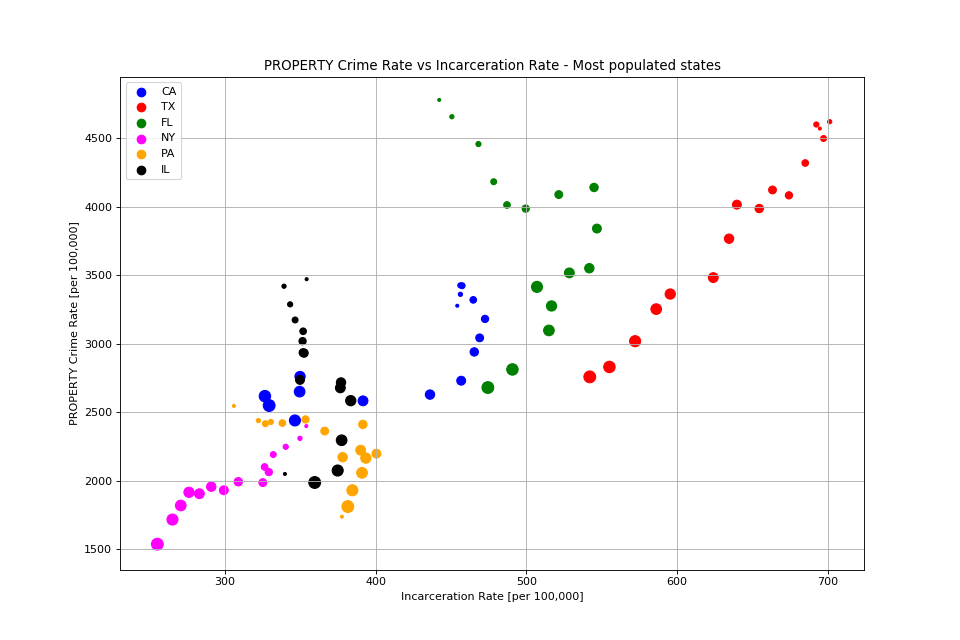

In [30]:
#scatter plot (colors indicate states, size indicates years)
fig, ax= plt.subplots(figsize=[12,8])

ax.scatter(CA_IR, CA_CR, color='blue', s=(CA_YR-2000)*7, label='CA')
ax.scatter(TX_IR, TX_CR, color='red',s=(TX_YR-2000)*7, label='TX')
ax.scatter(FL_IR, FL_CR, color='green',s=(FL_YR-2000)*7, label='FL')
ax.scatter(NY_IR, NY_CR, color='magenta',s=(NY_YR-2000)*7, label='NY')
ax.scatter(PA_IR, PA_CR, color='orange',s=(NY_YR-2000)*7, label='PA')
ax.scatter(IL_IR, IL_CR, color='black',s=(NY_YR-2000)*7, label='IL')

ax.set_xlabel('Incarceration Rate [per 100,000]')
ax.set_ylabel('PROPERTY Crime Rate [per 100,000]')
ax.set_title('PROPERTY Crime Rate vs Incarceration Rate - Most populated states')

# plt.xlim(200,800)
# plt.ylim(200,800)
plt.grid()
plt.legend()


#save the figure as png
plt.savefig('Property Crime Rate vs Incarceration Rate- Most Populated States.png')
plt.show()

# IR vs PCR by state

<IPython.core.display.Javascript object>


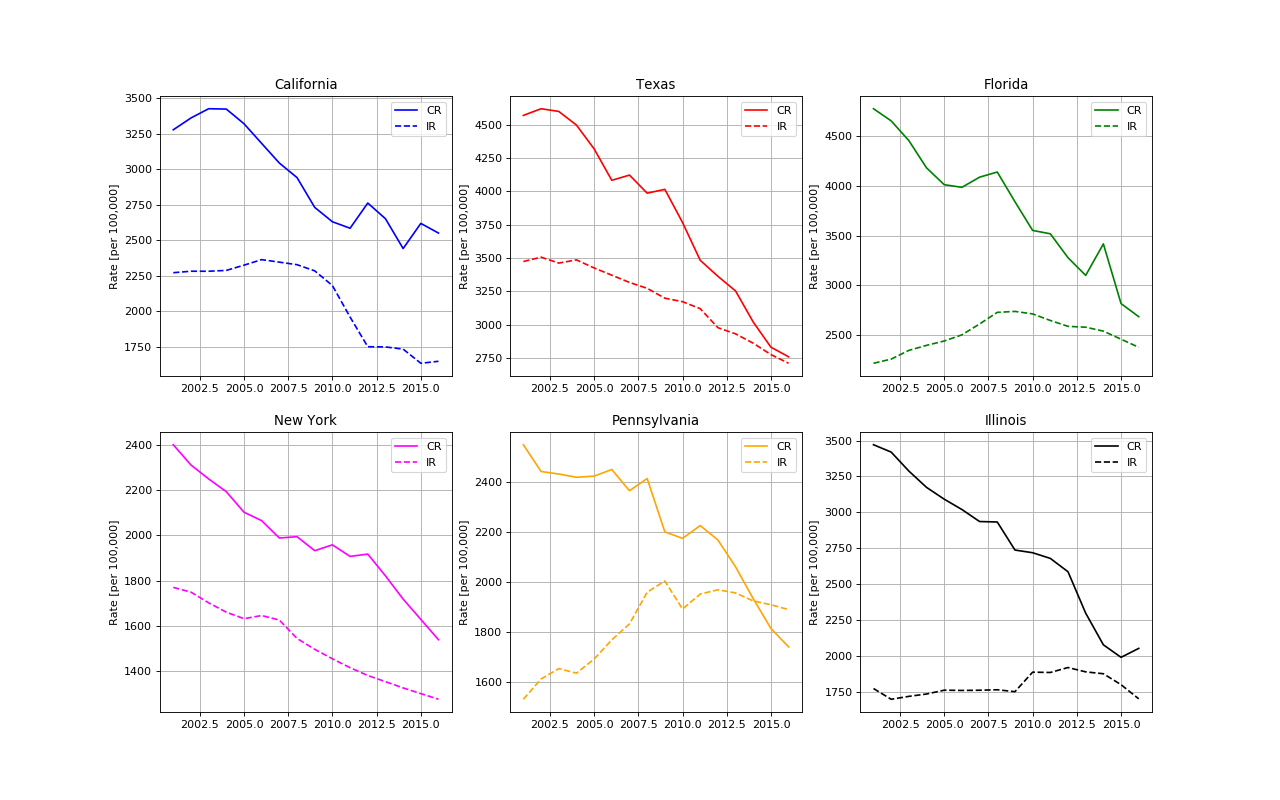

In [31]:
fig, ax= plt.subplots(2,3, figsize=[16,10])

## NOTE: noticed that to fit in same scale, I scaled IR by x5 ... need to find the way to plot having 2 different y scales 

ax[0,0].plot(CA_YR, CA_CR, color='blue', label ='CR')
ax[0,0].plot(CA_YR, CA_IR *5, color='blue', linestyle='--', label ='IR')
ax[0,0].set_ylabel('Rate [per 100,000]')
ax[0,0].set_title('California')
#ax[0,0].set_ylim(250,800)
ax[0,0].grid()
ax[0,0].legend()

ax[0,1].plot(TX_YR, TX_CR, color='red', label ='CR')
ax[0,1].plot(TX_YR, TX_IR *5, color='red', linestyle='--', label ='IR')
ax[0,1].set_ylabel('Rate [per 100,000]')
ax[0,1].set_title('Texas')
#ax[0,1].set_ylim(250,800)
ax[0,1].grid()
ax[0,1].legend()

ax[0,2].plot(FL_YR, FL_CR, color='green', label ='CR')
ax[0,2].plot(FL_YR, FL_IR *5, color='green', linestyle='--', label ='IR')
ax[0,2].set_ylabel('Rate [per 100,000]')
ax[0,2].set_title('Florida')
#ax[0,2].set_ylim(250,800)
ax[0,2].grid()
ax[0,2].legend()

ax[1,0].plot(NY_YR, NY_CR, color='magenta', label ='CR')
ax[1,0].plot(NY_YR, NY_IR *5, color='magenta', linestyle='--', label ='IR')
ax[1,0].set_ylabel('Rate [per 100,000]')
ax[1,0].set_title('New York')
#ax[1,0].set_ylim(250,800)
ax[1,0].grid()
ax[1,0].legend()

ax[1,1].plot(PA_YR, PA_CR, color='orange', label ='CR')
ax[1,1].plot(PA_YR, PA_IR *5, color='orange', linestyle='--', label ='IR')
ax[1,1].set_ylabel('Rate [per 100,000]')
ax[1,1].set_title('Pennsylvania')
#ax[1,1].set_ylim(250,800)
ax[1,1].grid()
ax[1,1].legend()

ax[1,2].plot(IL_YR, IL_CR, color='black', label ='CR')
ax[1,2].plot(IL_YR, IL_IR *5, color='black', linestyle='--', label ='IR')
ax[1,2].set_ylabel('Rate [per 100,000]')
ax[1,2].set_title('Illinois')
#ax[1,2].set_ylim(250,800)
ax[1,2].grid()
ax[1,2].legend()


#save the figure as png
plt.savefig('States CR vs IR for Property Crime Rate.png')
plt.show()

# Coefficient Analysis

In [32]:
CA_CC = np.corrcoef(CA_IR, CA_CR)[0,1]; print(f'Correlation coeff for CA = {CA_CC}')
TX_CC = np.corrcoef(TX_IR, TX_CR)[0,1]; print(f'Correlation coeff for TX = {TX_CC}')

FL_CC = np.corrcoef(FL_IR, FL_CR)[0,1]; print(f'Correlation coeff for FL = {FL_CC}')
NY_CC = np.corrcoef(NY_IR, NY_CR)[0,1]; print(f'Correlation coeff for NY = {NY_CC}')

PA_CC = np.corrcoef(PA_IR, PA_CR)[0,1]; print(f'Correlation coeff for PA = {PA_CC}')
IL_CC = np.corrcoef(IL_IR, IL_CR)[0,1]; print(f'Correlation coeff for IL = {IL_CC}')

Correlation coeff for CA = 0.7599651433924304
Correlation coeff for TX = 0.989433866309324
Correlation coeff for FL = -0.36077235135622177
Correlation coeff for NY = 0.9455129954652973
Correlation coeff for PA = -0.6417770055233507
Correlation coeff for IL = -0.45886795454446944


# HEATMAP (years 2012-2016)

In [33]:
#years 2012-2016 (and reduce crime rate for scale)
crime_map1 = crime_rate.loc[crime_rate['year'].isin([2012, 2013, 2014, 2015, 2016])]

crime_map1



jurisdiction  year  violent_crime_total  total_pop  crime rate
11       ALABAMA  2012              21693.0  4817528.0  450.293179
12       ALABAMA  2013              20834.0  4833996.0  430.989186
13       ALABAMA  2014              20727.0  4849377.0  427.415728
14       ALABAMA  2015              22952.0  4858979.0  472.362610
15       ALABAMA  2016              25878.0  4860545.0  532.409431
..           ...   ...                  ...        ...         ...
794      WYOMING  2012               1161.0   576626.0  201.343679
795      WYOMING  2013               1212.0   583223.0  207.810734
796      WYOMING  2014               1142.0   584153.0  195.496728
797      WYOMING  2015               1302.0   586107.0  222.143738
798      WYOMING  2016               1431.0   584910.0  244.653024

[249 rows x 5 columns]

In [34]:
#drop federal and reduce to scalable crime rate 
#crime_map1= crime_map1.drop(crime_map1[crime_map1['jurisdiction']=='FEDERAL'].index)
crime_map1['crime rate']=crime_map1['crime rate']/100
crime_map1

C:\Users\jenni\Anaconda3\envs\PandasLearn\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



jurisdiction  year  violent_crime_total  total_pop  crime rate
11       ALABAMA  2012              21693.0  4817528.0    4.502932
12       ALABAMA  2013              20834.0  4833996.0    4.309892
13       ALABAMA  2014              20727.0  4849377.0    4.274157
14       ALABAMA  2015              22952.0  4858979.0    4.723626
15       ALABAMA  2016              25878.0  4860545.0    5.324094
..           ...   ...                  ...        ...         ...
794      WYOMING  2012               1161.0   576626.0    2.013437
795      WYOMING  2013               1212.0   583223.0    2.078107
796      WYOMING  2014               1142.0   584153.0    1.954967
797      WYOMING  2015               1302.0   586107.0    2.221437
798      WYOMING  2016               1431.0   584910.0    2.446530

[249 rows x 5 columns]

In [35]:
#averages for years 2012-2016 chart
crime_map1= crime_map1.groupby('jurisdiction')['crime rate'].mean()
crime_map1

jurisdiction
ALABAMA           4.626940
ALASKA            6.826769
ARIZONA           4.250659
ARKANSAS          4.976995
CALIFORNIA        4.186885
COLORADO          3.173846
CONNECTICUT       2.457717
DELAWARE          5.098575
FLORIDA           4.776151
GEORGIA           3.802752
HAWAII            2.583495
IDAHO             2.167054
ILLINOIS          4.019528
INDIANA           3.713883
IOWA              2.782061
KANSAS            3.678418
KENTUCKY          2.203547
LOUISIANA         5.273808
MAINE             1.273538
MARYLAND          4.675350
MASSACHUSETTS     3.952709
MICHIGAN          4.421769
MINNESOTA         2.357867
MISSISSIPPI       2.747374
MISSOURI          4.692130
MONTANA           3.228546
NEBRASKA          2.751211
NEVADA            6.445900
NEW HAMPSHIRE     2.066845
NEW JERSEY        2.678259
NEW MEXICO        6.269949
NEW YORK          3.891424
NORTH CAROLINA    3.485906
NORTH DAKOTA      2.551283
OHIO              2.954607
OKLAHOMA          4.407557
OREGON         

In [36]:
#convert to dataframe
crime_map1_df = pd.DataFrame(crime_map1)
crime_map1_df

crime rate
jurisdiction              
ALABAMA           4.626940
ALASKA            6.826769
ARIZONA           4.250659
ARKANSAS          4.976995
CALIFORNIA        4.186885
COLORADO          3.173846
CONNECTICUT       2.457717
DELAWARE          5.098575
FLORIDA           4.776151
GEORGIA           3.802752
HAWAII            2.583495
IDAHO             2.167054
ILLINOIS          4.019528
INDIANA           3.713883
IOWA              2.782061
KANSAS            3.678418
KENTUCKY          2.203547
LOUISIANA         5.273808
MAINE             1.273538
MARYLAND          4.675350
MASSACHUSETTS     3.952709
MICHIGAN          4.421769
MINNESOTA         2.357867
MISSISSIPPI       2.747374
MISSOURI          4.692130
MONTANA           3.228546
NEBRASKA          2.751211
NEVADA            6.445900
NEW HAMPSHIRE     2.066845
NEW JERSEY        2.678259
NEW MEXICO        6.269949
NEW YORK          3.891424
NORTH CAROLINA    3.485906
NORTH DAKOTA      2.551283
OHIO              2.954607
OKLAHOMA          4.407557
OREGON            2.501699
PENNSYLVANIA      3.271298
RHODE ISLAND      2.422266
SOUTH CAROLINA    5.155886
SOUTH DAKOTA      3.557565
TENNESSEE         6.166728
TEXAS             4.141615
UTAH              2.263690
VERMONT           1.239621
VIRGINIA          2.001816
WASHINGTON        2.922355
WEST VIRGINIA     3.255783
WISCONSIN         2.935078
WYOMING           2.142896

In [37]:
#plot chloropleth map credit: https://plot.ly/python/choropleth-maps/

states_list= ['AL','AK','AZ','AR','CA','CO','CT','DE','FL','GA','HI','ID','IL','IN','IA','KS','KY','LA','ME','MD','MA','MI','MN','MS','MO','MT','NE','NV','NH','NJ','NM','NY','NC','ND','OH','OK','OR','PA','RI','SC','SD','TN','TX','UT','VT','VA','WA','WV','WI','WY']
# 
fig = go.Figure(data=go.Choropleth(
    locations=states_list, # Spatial coordinates
    z = crime_map1_df['crime rate'].astype(float), # Data to be color-coded
    locationmode = 'USA-states', # set of locations match entries in `locations`
    colorscale = 'YlOrRd',
    colorbar_title = "Violent Crimes per Total Pop",
))

fig.update_layout(
    title_text = 'Crime Rate Average (2012-2016)',
    geo_scope='usa', # limit map scope to USA
)

fig.show()

# HEATMAP (years 2007-2011)

In [38]:
#create dataframe with years 2007-2011
crime_map2 = crime_rate.loc[crime_rate['year'].isin([2007, 2008, 2009, 2010, 2011])]

crime_map2

jurisdiction  year  violent_crime_total  total_pop  crime rate
6        ALABAMA  2007              20775.0  4627851.0  448.912465
7        ALABAMA  2008              21110.0  4661900.0  452.819666
8        ALABAMA  2009              21194.0  4708708.0  450.102236
9        ALABAMA  2010              18363.0  4785401.0  383.729598
10       ALABAMA  2011              20166.0  4803689.0  419.802364
..           ...   ...                  ...        ...         ...
789      WYOMING  2007               1344.0   522830.0  257.062525
790      WYOMING  2008               1330.0   532668.0  249.686484
791      WYOMING  2009               1196.0   544270.0  219.743877
792      WYOMING  2010               1117.0   564554.0  197.855298
793      WYOMING  2011               1245.0   567356.0  219.438941

[250 rows x 5 columns]

In [39]:
#drop federal and reduce to scalable crime rate 
#crime_map2= crime_map2.drop(crime_map2[crime_map2['jurisdiction']=='FEDERAL'].index)
crime_map2['crime rate']=crime_map2['crime rate']/100
crime_map2

C:\Users\jenni\Anaconda3\envs\PandasLearn\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



jurisdiction  year  violent_crime_total  total_pop  crime rate
6        ALABAMA  2007              20775.0  4627851.0    4.489125
7        ALABAMA  2008              21110.0  4661900.0    4.528197
8        ALABAMA  2009              21194.0  4708708.0    4.501022
9        ALABAMA  2010              18363.0  4785401.0    3.837296
10       ALABAMA  2011              20166.0  4803689.0    4.198024
..           ...   ...                  ...        ...         ...
789      WYOMING  2007               1344.0   522830.0    2.570625
790      WYOMING  2008               1330.0   532668.0    2.496865
791      WYOMING  2009               1196.0   544270.0    2.197439
792      WYOMING  2010               1117.0   564554.0    1.978553
793      WYOMING  2011               1245.0   567356.0    2.194389

[250 rows x 5 columns]

In [40]:
#averages for years 20007-2011 chart
crime_map2= crime_map2.groupby('jurisdiction')['crime rate'].mean()
crime_map2

jurisdiction
ALABAMA           4.310733
ALASKA            6.384252
ARIZONA           4.515924
ARKANSAS          5.103635
CALIFORNIA        4.704600
COLORADO          3.364982
CONNECTICUT       2.932924
DELAWARE          6.498326
FLORIDA           6.159570
GEORGIA           4.370774
HAWAII            2.676826
IDAHO             2.332960
ILLINOIS          4.849144
INDIANA           3.324934
IOWA              2.792443
KANSAS            4.007886
KENTUCKY          2.652942
LOUISIANA         6.329270
MAINE             1.206976
MARYLAND          5.799739
MASSACHUSETTS     4.528526
MICHIGAN          4.968548
MINNESOTA         2.531141
MISSISSIPPI       2.840334
MISSOURI          4.922350
MONTANA           3.060321
NEBRASKA          2.889745
NEVADA            6.841617
NEW HAMPSHIRE     1.690655
NEW JERSEY        3.163761
NEW MEXICO        6.244426
NEW YORK          3.976382
NORTH CAROLINA    4.094442
NORTH DAKOTA      2.357053
OHIO              3.318349
OKLAHOMA          4.955547
OREGON         

In [41]:
#convert to dataframe
crime_map2_df = pd.DataFrame(crime_map2)
crime_map2_df

crime rate
jurisdiction              
ALABAMA           4.310733
ALASKA            6.384252
ARIZONA           4.515924
ARKANSAS          5.103635
CALIFORNIA        4.704600
COLORADO          3.364982
CONNECTICUT       2.932924
DELAWARE          6.498326
FLORIDA           6.159570
GEORGIA           4.370774
HAWAII            2.676826
IDAHO             2.332960
ILLINOIS          4.849144
INDIANA           3.324934
IOWA              2.792443
KANSAS            4.007886
KENTUCKY          2.652942
LOUISIANA         6.329270
MAINE             1.206976
MARYLAND          5.799739
MASSACHUSETTS     4.528526
MICHIGAN          4.968548
MINNESOTA         2.531141
MISSISSIPPI       2.840334
MISSOURI          4.922350
MONTANA           3.060321
NEBRASKA          2.889745
NEVADA            6.841617
NEW HAMPSHIRE     1.690655
NEW JERSEY        3.163761
NEW MEXICO        6.244426
NEW YORK          3.976382
NORTH CAROLINA    4.094442
NORTH DAKOTA      2.357053
OHIO              3.318349
OKLAHOMA          4.955547
OREGON            2.633166
PENNSYLVANIA      3.875975
RHODE ISLAND      2.479391
SOUTH CAROLINA    6.781820
SOUTH DAKOTA      2.524130
TENNESSEE         6.726850
TEXAS             4.732883
UTAH              2.182403
VERMONT           1.359611
VIRGINIA          2.346327
WASHINGTON        3.231729
WEST VIRGINIA     2.910991
WISCONSIN         2.649844
WYOMING           2.287574

In [42]:
#plot chloropleth map credit: https://plot.ly/python/choropleth-maps/

states_list= ['AL','AK','AZ','AR','CA','CO','CT','DE','FL','GA','HI','ID','IL','IN','IA','KS','KY','LA','ME','MD','MA','MI','MN','MS','MO','MT','NE','NV','NH','NJ','NM','NY','NC','ND','OH','OK','OR','PA','RI','SC','SD','TN','TX','UT','VT','VA','WA','WV','WI','WY']

fig = go.Figure(data=go.Choropleth(
    locations=states_list, # Spatial coordinates
    z = crime_map2_df['crime rate'].astype(float), # Data to be color-coded
    locationmode = 'USA-states', # set of locations match entries in `locations`
    colorscale = 'YlOrRd',
    colorbar_title = "Violent Crimes per Total Pop",
))

fig.update_layout(
    title_text = 'Crime Rate Average (2007-2011)',
    geo_scope='usa', # limit map scope to USA
)

fig.show()

# HEATMAP (years 2002-2006)

In [43]:
#create dstaframe with years 2002-2006
crime_map3 = crime_rate.loc[crime_rate['year'].isin([2002, 2003, 2004, 2005, 2006])]

#crime_map3= crime_rate.drop(crime_rate[crime_rate['year']==2001].index)
#crime_map3= crime_map3.drop(crime_map3[crime_map3['year']==2007].index)
#crime_map3= crime_map3.drop(crime_map3[crime_map3['year']==2008].index)
#crime_map3= crime_map3.drop(crime_map3[crime_map3['year']==2009].index)
#crime_map3= crime_map3.drop(crime_map3[crime_map3['year']==2010].index)
#crime_map3= crime_map3.drop(crime_map3[crime_map3['year']==2011].index)
#crime_map3= crime_map3.drop(crime_map3[crime_map3['year']==2012].index)
#crime_map3= crime_map3.drop(crime_map3[crime_map3['year']==2013].index)
#crime_map3= crime_map3.drop(crime_map3[crime_map3['year']==2014].index)
#crime_map3= crime_map3.drop(crime_map3[crime_map3['year']==2015].index)
#crime_map3= crime_map3.drop(crime_map3[crime_map3['year']==2016].index)
crime_map3

jurisdiction  year  violent_crime_total  total_pop  crime rate
1        ALABAMA  2002              19931.0  4478896.0  444.998053
2        ALABAMA  2003              19331.0  4503726.0  429.222382
3        ALABAMA  2004              19324.0  4525375.0  427.014336
4        ALABAMA  2005              19678.0  4548327.0  432.642596
5        ALABAMA  2006              19553.0  4599030.0  425.154870
..           ...   ...                  ...        ...         ...
784      WYOMING  2002               1364.0   498830.0  273.439849
785      WYOMING  2003               1314.0   502111.0  261.695123
786      WYOMING  2004               1163.0   505887.0  229.893237
787      WYOMING  2005               1172.0   508798.0  230.346817
788      WYOMING  2006               1307.0   515004.0  253.784437

[250 rows x 5 columns]

In [44]:
#drop federal and reduce to scalable crime rate 
#crime_map3= crime_map3.drop(crime_map3[crime_map3['jurisdiction']=='FEDERAL'].index)
crime_map3['crime rate']=crime_map3['crime rate']/100
crime_map3

C:\Users\jenni\Anaconda3\envs\PandasLearn\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



jurisdiction  year  violent_crime_total  total_pop  crime rate
1        ALABAMA  2002              19931.0  4478896.0    4.449981
2        ALABAMA  2003              19331.0  4503726.0    4.292224
3        ALABAMA  2004              19324.0  4525375.0    4.270143
4        ALABAMA  2005              19678.0  4548327.0    4.326426
5        ALABAMA  2006              19553.0  4599030.0    4.251549
..           ...   ...                  ...        ...         ...
784      WYOMING  2002               1364.0   498830.0    2.734398
785      WYOMING  2003               1314.0   502111.0    2.616951
786      WYOMING  2004               1163.0   505887.0    2.298932
787      WYOMING  2005               1172.0   508798.0    2.303468
788      WYOMING  2006               1307.0   515004.0    2.537844

[250 rows x 5 columns]

In [45]:
#averages for years 2002-2006 chart
crime_map3= crime_map3.groupby('jurisdiction')['crime rate'].mean()
crime_map3

jurisdiction
ALABAMA           4.318064
ALASKA            6.232198
ARIZONA           5.253469
ARKANSAS          4.929958
CALIFORNIA        5.524517
COLORADO          3.726883
CONNECTICUT       2.981107
DELAWARE          6.449611
FLORIDA           7.278823
GEORGIA           4.577935
HAWAII            2.651835
IDAHO             2.509332
ILLINOIS          5.595577
INDIANA           3.362323
IOWA              2.860826
KANSAS            3.949328
KENTUCKY          2.603885
LOUISIANA         6.516015
MAINE             1.097298
MARYLAND          7.115733
MASSACHUSETTS     4.759004
MICHIGAN          5.324880
MINNESOTA         2.815556
MISSISSIPPI       3.109026
MISSOURI          5.182788
MONTANA           3.337989
NEBRASKA          2.995663
NEVADA            6.455933
NEW HAMPSHIRE     1.503272
NEW JERSEY        3.604291
NEW MEXICO        6.792864
NEW YORK          4.564808
NORTH CAROLINA    4.633686
NORTH DAKOTA      1.109517
OHIO              3.471882
OKLAHOMA          5.040733
OREGON         

In [46]:
#convert to dataframe
crime_map3_df = pd.DataFrame(crime_map3)
crime_map3_df

crime rate
jurisdiction              
ALABAMA           4.318064
ALASKA            6.232198
ARIZONA           5.253469
ARKANSAS          4.929958
CALIFORNIA        5.524517
COLORADO          3.726883
CONNECTICUT       2.981107
DELAWARE          6.449611
FLORIDA           7.278823
GEORGIA           4.577935
HAWAII            2.651835
IDAHO             2.509332
ILLINOIS          5.595577
INDIANA           3.362323
IOWA              2.860826
KANSAS            3.949328
KENTUCKY          2.603885
LOUISIANA         6.516015
MAINE             1.097298
MARYLAND          7.115733
MASSACHUSETTS     4.759004
MICHIGAN          5.324880
MINNESOTA         2.815556
MISSISSIPPI       3.109026
MISSOURI          5.182788
MONTANA           3.337989
NEBRASKA          2.995663
NEVADA            6.455933
NEW HAMPSHIRE     1.503272
NEW JERSEY        3.604291
NEW MEXICO        6.792864
NEW YORK          4.564808
NORTH CAROLINA    4.633686
NORTH DAKOTA      1.109517
OHIO              3.471882
OKLAHOMA          5.040733
OREGON            2.915086
PENNSYLVANIA      4.158030
RHODE ISLAND      2.603239
SOUTH CAROLINA    7.914977
SOUTH DAKOTA      1.932586
TENNESSEE         7.253124
TEXAS             5.438277
UTAH              2.343967
VERMONT           1.212742
VIRGINIA          2.824757
WASHINGTON        3.460875
WEST VIRGINIA     2.652498
WISCONSIN         2.367730
WYOMING           2.498319

In [47]:
#plot chloropleth map credit: https://plot.ly/python/choropleth-maps/

states_list= ['AL','AK','AZ','AR','CA','CO','CT','DE','FL','GA','HI','ID','IL','IN','IA','KS','KY','LA','ME','MD','MA','MI','MN','MS','MO','MT','NE','NV','NH','NJ','NM','NY','NC','ND','OH','OK','OR','PA','RI','SC','SD','TN','TX','UT','VT','VA','WA','WV','WI','WY']

fig = go.Figure(data=go.Choropleth(
    locations=states_list, # Spatial coordinates
    z = crime_map3_df['crime rate'].astype(float), # Data to be color-coded
    locationmode = 'USA-states', # set of locations match entries in `locations`
    colorscale = 'YlOrRd',
    colorbar_title = "Violent Crimes per Total Pop",
))

fig.update_layout(
    title_text = 'Crime Rate Average (2002-2006)',
    geo_scope='usa', # limite map scope to USA
)

fig.show()

# Bar Charts for Types of Crimes

In [48]:
#find the states with the highest crime rate from charts above
crime_map1_df.nlargest(5, ['crime rate']) 

crime rate
jurisdiction            
ALASKA          6.826769
NEVADA          6.445900
NEW MEXICO      6.269949
TENNESSEE       6.166728
LOUISIANA       5.273808

In [49]:
#find the states with the highest crime rate from charts above
crime_map2_df.nlargest(5, ['crime rate'])

crime rate
jurisdiction              
NEVADA            6.841617
SOUTH CAROLINA    6.781820
TENNESSEE         6.726850
DELAWARE          6.498326
ALASKA            6.384252

In [50]:
#find the states with the highest crime rate from charts above
crime_map3_df.nlargest(5, ['crime rate'])

crime rate
jurisdiction              
SOUTH CAROLINA    7.914977
FLORIDA           7.278823
TENNESSEE         7.253124
MARYLAND          7.115733
NEW MEXICO        6.792864

In [51]:
#list for states to sum up the types of violent crimes for the states above from original dataframe
top_crime_states=['ALASKA', 'NEVADA', 'NEW MEXICO', 'TENNESSEE', 'LOUISIANA', 'SOUTH CAROLINA', 'DELAWARE', 'ALASKA', 'FLORIDA', 'MARYLAND']


In [52]:
#sum up each type of violent crime committed in each top state
violent_crimes=crime_data.groupby(['jurisdiction']).agg(murder=pd.NamedAgg(column='murder_manslaughter', aggfunc='sum'),
                                                                   rape=pd.NamedAgg(column='rape_legacy', aggfunc='sum'),
                                                                   robbery=pd.NamedAgg(column='robbery', aggfunc='sum'),
                                                                    assault=pd.NamedAgg(column='agg_assault', aggfunc='sum'))
violent_crimes

murder      rape   robbery    assault
jurisdiction                                          
ALABAMA          5369.0   22673.0   91578.0   207798.0
ALASKA            585.0    8144.0    9576.0    51644.0
ARIZONA          6545.0   32239.0  125841.0   298853.0
ARKANSAS         2771.0   17803.0   38613.0   164746.0
CALIFORNIA      33486.0  134138.0  972970.0  1718904.0
COLORADO         2672.0   31866.0   55497.0   174487.0
CONNECTICUT      1746.0   10284.0   60656.0    85383.0
DELAWARE          685.0    5058.0   23472.0    54355.0
FLORIDA         16307.0   89574.0  461613.0  1229067.0
GEORGIA          9696.0   32869.0  221437.0   380379.0
HAWAII            407.0    5391.0   17259.0    31729.0
IDAHO             518.0    7989.0    3740.0    43077.0
ILLINOIS        12950.0   57504.0  339581.0   586662.0
INDIANA          5502.0   26025.0  111863.0   209164.0
IOWA              814.0   12741.0   17831.0   102009.0
KANSAS           1748.0   16978.0   28564.0   124976.0
KENTUCKY         3089.0   18666.0   56483.0    88445.0
LOUISIANA        8457.0   20332.0   96880.0   310276.0
MAINE             350.0    5420.0    5319.0    13198.0
MARYLAND         7589.0   18572.0  192077.0   322768.0
MASSACHUSETTS    2571.0   25972.0  110236.0   322273.0
MICHIGAN        10034.0   72179.0  179230.0   515039.0
MINNESOTA        1718.0   28234.0   63514.0   118302.0
MISSISSIPPI      3737.0   14647.0   43897.0    73457.0
MISSOURI         6315.0   23799.0  107736.0   326037.0
MONTANA           476.0    5004.0    3544.0    40196.0
NEBRASKA          858.0    8921.0   17757.0    54013.0
NEVADA           2836.0   15102.0   89658.0   159315.0
NEW HAMPSHIRE     242.0    6569.0    7477.0    21288.0
NEW JERSEY       6026.0   16721.0  194628.0   227241.0
NEW MEXICO       2250.0   15378.0   33617.0   153218.0
NEW YORK        12120.0   44804.0  462419.0   702579.0
NORTH CAROLINA   8506.0   31956.0  179617.0   378562.0
NORTH DAKOTA      229.0    3594.0    1569.0    15195.0
OHIO             8345.0   64498.0  262449.0   257253.0
OKLAHOMA         3291.0   22502.0   50980.0   203144.0
OREGON           1382.0   17912.0   40314.0   100497.0
PENNSYLVANIA    10719.0   50859.0  269108.0   422512.0
RHODE ISLAND      473.0    4917.0   11954.0    24936.0
SOUTH CAROLINA   5159.0   26137.0   83414.0   359147.0
SOUTH DAKOTA      355.0    6538.0    2432.0    23988.0
TENNESSEE        6477.0   31629.0  145045.0   482192.0
TEXAS           20977.0  122450.0  553418.0  1159232.0
UTAH              867.0   14155.0   20184.0    58691.0
VERMONT           181.0    1989.0    1410.0     8726.0
VIRGINIA         6099.0   25060.0   98169.0   167377.0
WASHINGTON       2975.0   38087.0   94660.0   199214.0
WEST VIRGINIA    1122.0    5512.0   12362.0    65300.0
WISCONSIN        2793.0   17867.0   76934.0   135824.0
WYOMING           229.0    2208.0    1181.0    16092.0

## Stacked Bar Chart for types of crime by state

<IPython.core.display.Javascript object>


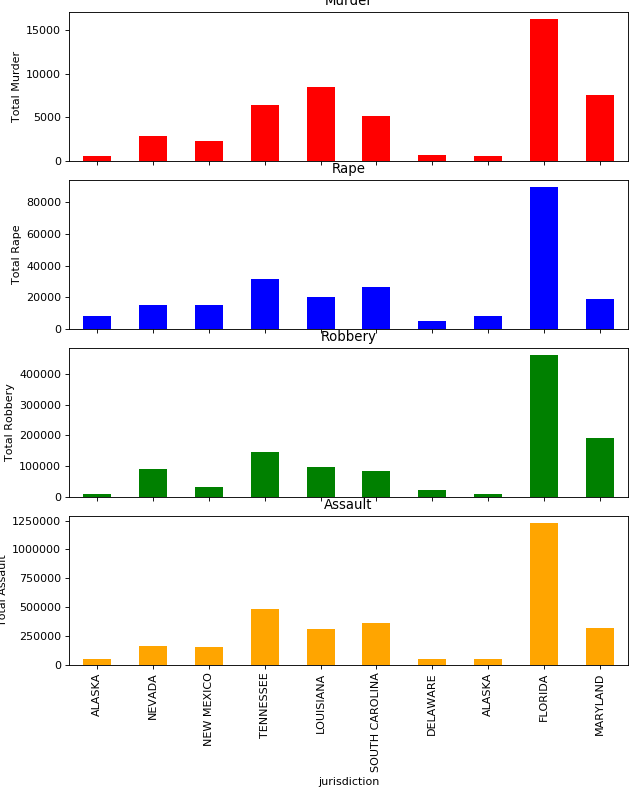

In [55]:
#graph bars charts for each crime type by state
fig, ax = plt.subplots(4, sharex=True, figsize=(8,10))
colors= ['red', 'blue', 'green','orange']
for i,crime_type in enumerate(['murder', 'rape', 'robbery','assault']):
    violent_crimes.loc[top_crime_states, crime_type].plot(kind='bar', ax=ax[i], color=colors[i])
plt.tight_layout()

ax[0].set_title('Murder')
ax[1].set_title('Rape')
ax[2].set_title('Robbery')
ax[3].set_title('Assault')
ax[0].set_ylabel('Total Murder')
ax[1].set_ylabel('Total Rape')
ax[2].set_ylabel('Total Robbery')
ax[3].set_ylabel('Total Assault')

#save the figure as png
plt.savefig('Bar Charts for Violent Crime Types By Top States.png')

## Nationwide Average of Incarceration Rate, Crime Rates and Population from 2001 to 2016

In [123]:
#Grouping the data by Jurisdiction and Year: to get Total Population, Total Incarceration and Total Crime
crime_data_nationwide=crime_data.groupby(["jurisdiction","year"])["state_population", "prisoner_count","violent_crime_total","property_crime_total"].sum()
crime_data_nationwide["Total_Crime"]=crime_data_nationwide["violent_crime_total"]+crime_data_nationwide["property_crime_total"]
crime_data_nationwide["Total_Crime"]=crime_data_nationwide["Total_Crime"]
crime_data_nationwide

state_population  prisoner_count  violent_crime_total  \
jurisdiction year                                                          
ALABAMA      2001         4468912.0           24741              19582.0   
             2002         4478896.0           25100              19931.0   
             2003         4503726.0           27614              19331.0   
             2004         4525375.0           25635              19324.0   
             2005         4548327.0           24315              19678.0   
...                             ...             ...                  ...   
WYOMING      2012          576626.0            2187               1161.0   
             2013          583223.0            2288               1212.0   
             2014          584153.0            2369               1142.0   
             2015          586107.0            2400               1302.0   
             2016          584910.0            2352               1431.0   

                   property_crime_total  Total_Crime  
jurisdiction year                                     
ALABAMA      2001              173253.0     192835.0  
             2002              180400.0     200331.0  
             2003              182241.0     201572.0  
             2004              182340.0     201664.0  
             2005              177393.0     197071.0  
...                                 ...          ...  
WYOMING      2012               13222.0      14383.0  
             2013               12809.0      14021.0  
             2014               11477.0      12619.0  
             2015               11151.0      12453.0  
             2016               11460.0      12891.0  

[799 rows x 5 columns]

In [124]:
#Normalizing Crime total and Incarceration total to population
crime_data_nationwide["Violent_Crime_Rate"]=(crime_data_nationwide["violent_crime_total"]/crime_data_nationwide["state_population"])*100
crime_data_nationwide["Property_Crime_Rate"]=(crime_data_nationwide["property_crime_total"]/crime_data_nationwide["state_population"])*100
crime_data_nationwide["Total_Crime_Rate"]=(crime_data_nationwide["Total_Crime"]/crime_data_nationwide["state_population"])*100
crime_data_nationwide["Incarceration_Rate"]=(crime_data_nationwide["prisoner_count"]/crime_data_nationwide["state_population"])*100
crime_data_nationwide

state_population  prisoner_count  violent_crime_total  \
jurisdiction year                                                          
ALABAMA      2001         4468912.0           24741              19582.0   
             2002         4478896.0           25100              19931.0   
             2003         4503726.0           27614              19331.0   
             2004         4525375.0           25635              19324.0   
             2005         4548327.0           24315              19678.0   
...                             ...             ...                  ...   
WYOMING      2012          576626.0            2187               1161.0   
             2013          583223.0            2288               1212.0   
             2014          584153.0            2369               1142.0   
             2015          586107.0            2400               1302.0   
             2016          584910.0            2352               1431.0   

                   property_crime_total  Total_Crime  Violent_Crime_Rate  \
jurisdiction year                                                          
ALABAMA      2001              173253.0     192835.0            0.438183   
             2002              180400.0     200331.0            0.444998   
             2003              182241.0     201572.0            0.429222   
             2004              182340.0     201664.0            0.427014   
             2005              177393.0     197071.0            0.432643   
...                                 ...          ...                 ...   
WYOMING      2012               13222.0      14383.0            0.201344   
             2013               12809.0      14021.0            0.207811   
             2014               11477.0      12619.0            0.195497   
             2015               11151.0      12453.0            0.222144   
             2016               11460.0      12891.0            0.244653   

                   Property_Crime_Rate  Total_Crime_Rate  Incarceration_Rate  
jurisdiction year                                                             
ALABAMA      2001             3.876850          4.315032            0.553625  
             2002             4.027778          4.472776            0.560406  
             2003             4.046450          4.475672            0.613137  
             2004             4.029279          4.456294            0.566472  
             2005             3.900181          4.332824            0.534592  
...                                ...               ...                 ...  
WYOMING      2012             2.292994          2.494338            0.379275  
             2013             2.196244          2.404055            0.392303  
             2014             1.964725          2.160222            0.405544  
             2015             1.902554          2.124697            0.409482  
             2016             1.959276          2.203929            0.402113  

[799 rows x 9 columns]

In [125]:

#Reseting index and summarizing date to a pivot tabel
#crime_data_nationwide=crime_data_nationwide.reset_index()
crime_rate_nationwide=pd.pivot_table(crime_data_nationwide, values=['state_population',"Total_Crime",'Violent_Crime_Rate','Property_Crime_Rate','Total_Crime_Rate','Incarceration_Rate'],index=['year'],
                            aggfunc={'state_population': np.mean,"Total_Crime": np.mean,'Violent_Crime_Rate': np.mean,'Property_Crime_Rate': np.mean,'Total_Crime_Rate': np.mean,'Incarceration_Rate': np.mean})
#Population in millions and total crime in 100,000
crime_rate_nationwide['Population_in_Millions']=crime_rate_nationwide['state_population']/1000000
crime_rate_nationwide['Total_Crime']=crime_rate_nationwide['Total_Crime']/100000

#deleting unwanted column
del crime_rate_nationwide['state_population']
crime_rate_nationwide

Incarceration_Rate  Property_Crime_Rate  Total_Crime  Total_Crime_Rate  \
year                                                                           
2001            0.383185             3.585812     2.366448          4.006154   
2002            0.389647             3.565396     2.366631          3.979105   
2003            0.393823             3.510412     2.356956          3.914216   
2004            0.395932             3.430747     2.328998          3.827990   
2005            0.401277             3.356759     2.306267          3.758293   
2006            0.409342             3.267852     2.283778          3.689690   
2007            0.412179             3.184960     2.253587          3.603192   
2008            0.409055             3.103915     2.225979          3.511536   
2009            0.404720             2.951514     2.125274          3.339195   
2010            0.400075             2.860939     2.065409          3.227380   
2011            0.396402             2.847870     2.044337          3.202143   
2012            0.392512             2.829115     2.036087          3.184519   
2013            0.389092             2.710356     1.962187          3.062189   
2014            0.390612             2.551913     1.886694          2.898722   
2015            0.382480             2.488784     1.794395          2.850501   
2016            0.370725             2.459216     1.834705          2.837202   

      Violent_Crime_Rate  Population_in_Millions  
year                                              
2001            0.420342                5.694875  
2002            0.413709                5.748095  
2003            0.403804                5.804627  
2004            0.397243                5.862052  
2005            0.401534                5.918500  
2006            0.421838                5.976339  
2007            0.418232                6.020657  
2008            0.407621                6.069358  
2009            0.387680                6.128138  
2010            0.366441                6.174506  
2011            0.354273                6.219376  
2012            0.355404                6.264805  
2013            0.351833                6.316968  
2014            0.346809                6.363963  
2015            0.361717                6.141853  
2016            0.377985                6.454432

In [126]:
#Rearranging columns
crime_rate_nationwide1=crime_rate_nationwide[['Total_Crime_Rate','Property_Crime_Rate','Violent_Crime_Rate','Incarceration_Rate','Population_in_Millions','Total_Crime']]
crime_rate_nationwide1

Total_Crime_Rate  Property_Crime_Rate  Violent_Crime_Rate  \
year                                                              
2001          4.006154             3.585812            0.420342   
2002          3.979105             3.565396            0.413709   
2003          3.914216             3.510412            0.403804   
2004          3.827990             3.430747            0.397243   
2005          3.758293             3.356759            0.401534   
2006          3.689690             3.267852            0.421838   
2007          3.603192             3.184960            0.418232   
2008          3.511536             3.103915            0.407621   
2009          3.339195             2.951514            0.387680   
2010          3.227380             2.860939            0.366441   
2011          3.202143             2.847870            0.354273   
2012          3.184519             2.829115            0.355404   
2013          3.062189             2.710356            0.351833   
2014          2.898722             2.551913            0.346809   
2015          2.850501             2.488784            0.361717   
2016          2.837202             2.459216            0.377985   

      Incarceration_Rate  Population_in_Millions  Total_Crime  
year                                                           
2001            0.383185                5.694875     2.366448  
2002            0.389647                5.748095     2.366631  
2003            0.393823                5.804627     2.356956  
2004            0.395932                5.862052     2.328998  
2005            0.401277                5.918500     2.306267  
2006            0.409342                5.976339     2.283778  
2007            0.412179                6.020657     2.253587  
2008            0.409055                6.069358     2.225979  
2009            0.404720                6.128138     2.125274  
2010            0.400075                6.174506     2.065409  
2011            0.396402                6.219376     2.044337  
2012            0.392512                6.264805     2.036087  
2013            0.389092                6.316968     1.962187  
2014            0.390612                6.363963     1.886694  
2015            0.382480                6.141853     1.794395  
2016            0.370725                6.454432     1.834705

In [127]:
#Final pivot tabel(Excluded 2015, 2016 as Data missing for Newyork for the year 2015)
#crime_rate_nationwide=crime_rate_nationwide1.iloc[0:14,:]

crime_rate_nationwide=crime_rate_nationwide1

<IPython.core.display.Javascript object>


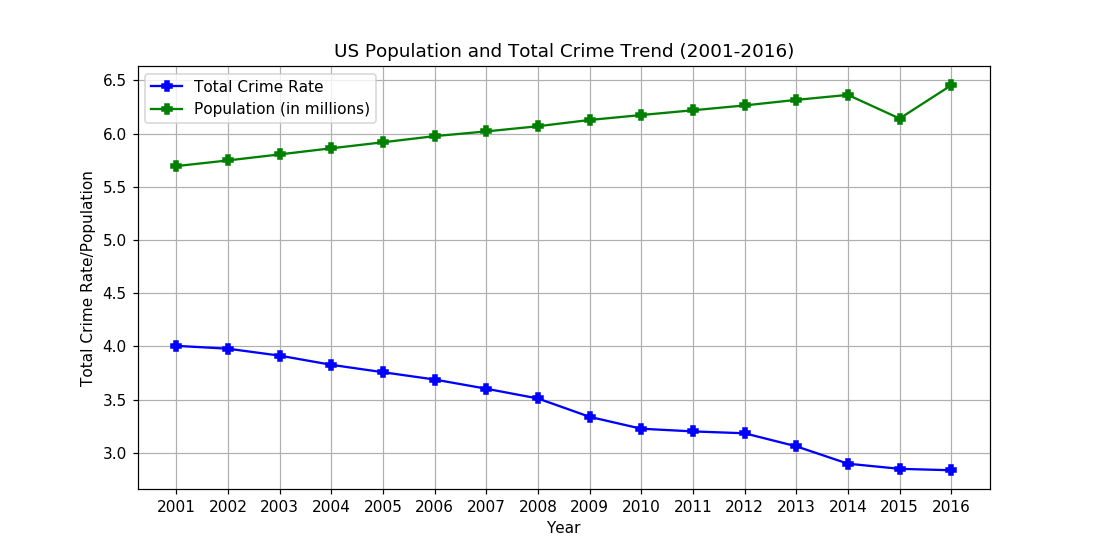

In [137]:
#Analysis 1 
fig, ax1 = plt.subplots()


#Years on x axis
x_axis = crime_rate_nationwide.index

tick_locations = [value for value in x_axis]
ax1.set_xticks(tick_locations, minor=False)
ax1.set_xlabel('Year')

#Set Title
ax1.set_title('US Population and Total Crime Trend (2001-2016)')

#ax1.plot(x_axis, crime_rate_nationwide["Total_Crime"],marker="P",color='purple',label="Total Number of Crimes")
ax1.plot(x_axis, crime_rate_nationwide['Total_Crime_Rate'],marker="P",color='blue',label="Total Crime Rate")
ax1.plot(x_axis, crime_rate_nationwide['Population_in_Millions'],marker="P",color='green',label="Population (in millions)")
ax1.set_ylabel('Total Crime Rate/Population')
#display legend without blocking the data
ax1.legend(loc='upper left')


#Add grid for better  analysis
ax1.grid(True)

 
# #second axis label and parameters
# color = 'tab:blue'
# ax2.set_ylabel('Total Crime Rate/Population', color=color)
# ax2.tick_params(axis='y', labelcolor=color)

#Display the graph
plt.show()
plt.rcParams['figure.figsize']=(8,5)


# Save the Figure
plt.savefig("Crime_Trend_to_population_Analysis_nationwide.png")

<IPython.core.display.Javascript object>


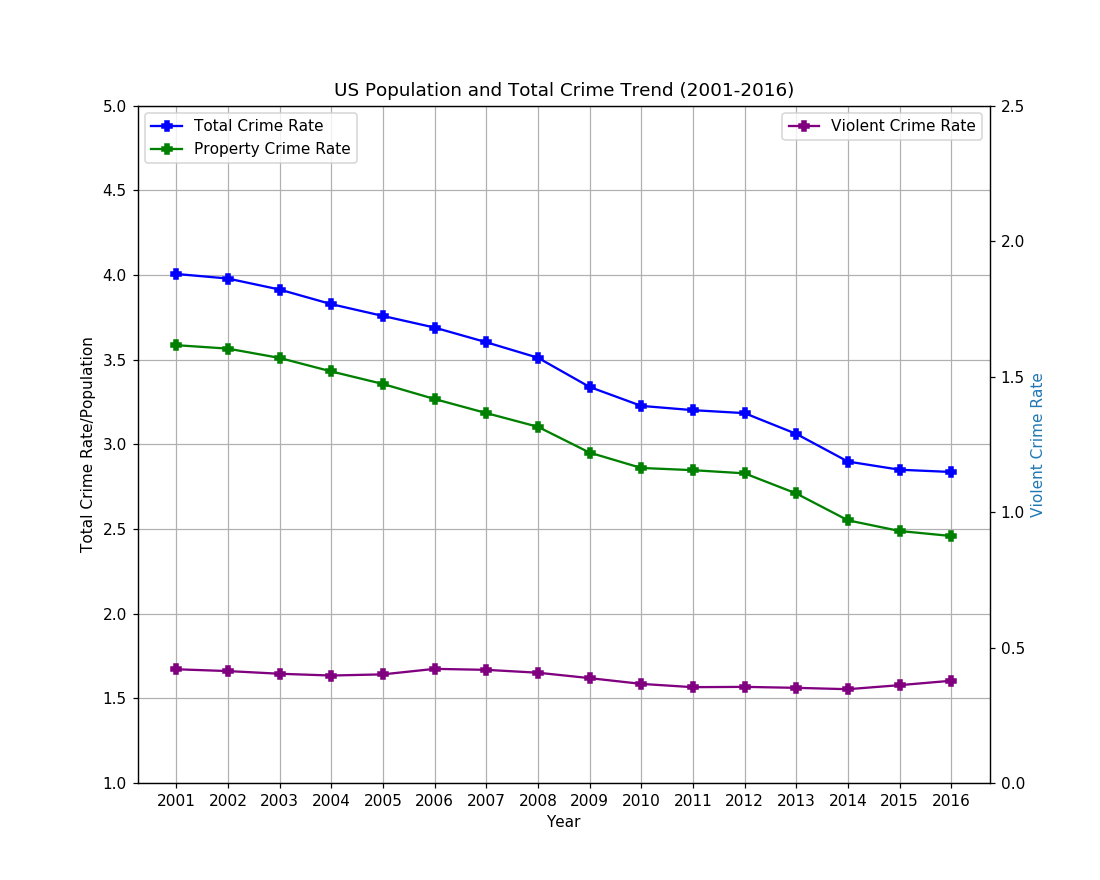

In [129]:
#Analysis 1 
fig, ax1 = plt.subplots()


#Years on x axis
x_axis = crime_rate_nationwide.index

tick_locations = [value for value in x_axis]
ax1.set_xticks(tick_locations, minor=False)
ax1.set_xlabel('Year')

#Set Title
ax1.set_title('US Population and Total Crime Trend (2001-2016)')


ax1.plot(x_axis, crime_rate_nationwide['Total_Crime_Rate'],marker="P",color='blue',label="Total Crime Rate")
ax1.plot(x_axis, crime_rate_nationwide['Property_Crime_Rate'],marker="P",color='green',label="Property Crime Rate")
ax1.set_ylabel('Total Crime Rate/Population')
#display legend without blocking the data
ax1.legend(loc='upper left')
ax1.set_ylim([1,5])


#Add grid for better  analysis
ax1.grid(True)

#second axis label and parameters
ax2 = ax1.twinx()
 

color = 'tab:blue'
ax2.plot(x_axis, crime_rate_nationwide["Violent_Crime_Rate"],marker="P",color='purple',label="Violent Crime Rate")
ax2.set_ylabel('Violent Crime Rate', color=color)
ax2.set_ylim([0, 2.5])
ax2.legend(loc='upper right')
# ax2.tick_params(axis='y', labelcolor=color)

#Display the graph
plt.show()
plt.rcParams['figure.figsize']=(20,10)



# Save the Figure
plt.savefig("Crime_Trend_Analysis_nationwide.png")

In [130]:
# #Analysis 1 
# fig, ax2 = plt.subplots()

# tick_locations = [value for value in x_axis]
# ax2.set_xticks(tick_locations, minor=False)
# ax2.set_xlabel('Year')
# x

# ax2.set_ylabel('Incarceration rate(%)', color=color)
# ax2.tick_params(axis='y', labelcolor=color)
# ax2.set_title('US Incarceration rate for 14 years (2001-2014)')
# #ax2.set_yticks(np.arange(0,1,0.005))
# #axes = plt.axes()
# ax2.set_ylim([0, 0.8])

# #plot
# ax2.plot(x_axis, crime_rate_nationwide['Incarceration_Rate'],marker='*',color='black',label="Incarceration Rate")
# ax1.legend(loc='upper left')
# ax2.grid(True)

# #Display the graph
# plt.show()
# plt.rcParams['figure.figsize']=(10,8)



# # Save the Figure
# plt.savefig("Incarceration_rate(nationwide).png")


<IPython.core.display.Javascript object>


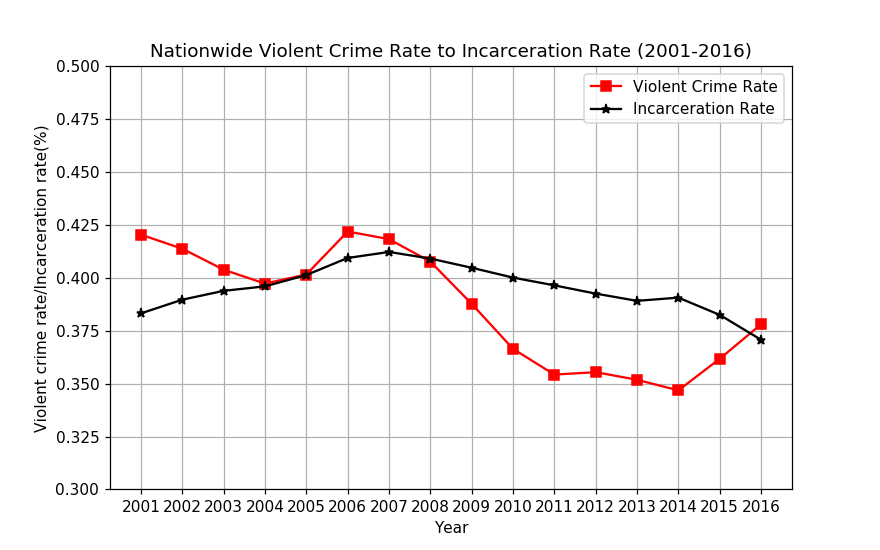

In [138]:
fig, ax2 = plt.subplots()

tick_locations = [value for value in x_axis]
ax2.set_xticks(tick_locations, minor=False)
ax2.set_xlabel('Year')

ax2.plot(x_axis, crime_rate_nationwide['Violent_Crime_Rate'],marker='s',color='red',label="Violent Crime Rate")
ax2.plot(x_axis, crime_rate_nationwide['Incarceration_Rate'],marker='*',color='black',label="Incarceration Rate")
ax2.set_ylabel('Violent crime rate/Incarceration rate(%)')
ax2.set_ylim([0.3, 0.5])
ax2.grid()
ax2.legend(loc='upper right')

#Display the graph
plt.show()
plt.rcParams['figure.figsize']=(8,5)
#Set Title
ax2.set_title('Nationwide Violent Crime Rate to Incarceration Rate (2001-2016)')
ax2.set_xlabel('Year')



# Save the Figure
plt.savefig("Violent_Crime_to_Incarceration_rate_nationwide.png")


# # instantiate a second axes that shares the same x-axis
# ay2 = ax2.twinx() 
# fig, ax2 = plt.subplots()
# #second axis label and parameters
# color = 'tab:green'
# ay2.set_ylabel('Total Crime Rate/Property Crime Rate', color=color)
# ay2.tick_params(axis='y', labelcolor=color)

# ay2.plot(x_axis, crime_rate_nationwide['Property_Crime_Rate'],marker="s",color='orange',label="Property Crime Rate")

## Calculating Correlation Coeffient: Incraceration Rate and violent/ property/ total Crime Rate

In [132]:
#VIOLENT CRIME RATE
VC=np.array(crime_rate_nationwide['Violent_Crime_Rate'])
#PROPERTY CRIME RATE
PC=np.array(crime_rate_nationwide['Property_Crime_Rate'])
#TOTAL CRIME RATE
TC=np.array(crime_rate_nationwide['Total_Crime_Rate'])
#INCARCERATION RATE
IR=np.array(crime_rate_nationwide['Incarceration_Rate'])

In [133]:
#Corr Coef
#VIOLENT CRIME RATE and IR
cor_cov1=np.corrcoef(VC,IR)[0,1]
#PROPERTY CRIME RATE and IR
cor_cov3=np.corrcoef(PC,IR)[0,1]
#TOTAL CRIME RATE and IR
cor_cov2=np.corrcoef(TC,IR)[0,1]
print(f'Correlation coeff Total crime rate to Incarceration rate = {cor_cov2}')
print(f'Correlation coeff Property crime rate to Incarceration rate = {cor_cov3}')
print(f'Correlation coeff Violent crime rate to Incarceration rate = {cor_cov1}')

Correlation coeff Total crime rate to Incarceration rate = 0.3610813760723325
Correlation coeff Property crime rate to Incarceration rate = 0.355357600296008
Correlation coeff Violent crime rate to Incarceration rate = 0.3820079899945861


In [134]:
#The correlation coefficients are very less 